# Analyze: V1 overnight growth in stage 5

Question: after 1 day in stage 5, how would the V1 animals have grown overnight?

In other words, if we pretend that the v1 animals are a start low, overnight growth, early penalty group, how would they have grown? This analysis can be used to think about knockout curricula and which are relevant. This will be a little different since the fixation duration was technically growing during the session (as opposed to staying at 0.01), so their average valid cpoke may be skewed to be larger than it would in the true case. However, it will give an idea of how much growth is “missed out” on just this day alone. It will also show if quick flicking is something they learn to do or something that is innate to them and they have to unlearn


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import pandas as pd
import numpy as np  

import sys
sys.path.append('/Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/_active_experiments/FixationGrower')
# Path to the 'meetings' directory where your .py file resides
meetings_path = "/Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/meetings"
if meetings_path not in sys.path:
    sys.path.append(meetings_path)
import config_alpha_experiment as alpha_config

import behav_viz.visualize as viz
import behav_viz.utils as utils
from behav_viz.utils import plot_utils as pu
from TCM_mtg_2024_09_05_FixationExperiment import *
FIGURES_PATH = utils.dir_utils.get_figures_path("rats", "alpha")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

DATA_PATH = "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/meetings/2024_12_LabMeeting/"


[2025-02-03 15:36:53,074][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2025-02-03 15:36:54,750][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


## 0. Load Data


In [2]:
tdf = pd.read_csv(DATA_PATH + "2024_12_lab_meeting_alpha_trials.csv", low_memory=False)

## 1. Filter for cohort, days of interest


In [9]:
df = viz.df_preperation.compute_days_relative_to_stage(
    tdf.query("fix_experiment == 'V1' and stage < 6").copy(), stage=5
)
df.head()

,trial,animal_id,date,sess_id,protocol,result,hits,violations,temperror,hit_rate,...,ab_beta,ab_tau,exp_tau,exp_min,exp_max,sound_pair,min_time_to_spoke,violation_due_to_spoke,datetime_col,days_relative_to_stage_5
0,1,R040,2024-08-01,965069,FixationGrower,1,1.0,0.0,0.0,0.0,...,0.0,30.0,1.2,1.0,2.0,"nan, nan",4.3482,NaN,2024-08-01,0
1,2,R040,2024-08-01,965069,FixationGrower,1,1.0,0.0,0.0,1.0,...,0.1,30.0,1.2,1.0,2.0,"nan, nan",1.2867,NaN,2024-08-01,0
2,3,R040,2024-08-01,965069,FixationGrower,1,1.0,0.0,0.0,1.0,...,0.2,30.0,1.2,1.0,2.0,"nan, nan",1.9351,NaN,2024-08-01,0
3,4,R040,2024-08-01,965069,FixationGrower,1,1.0,0.0,0.0,1.0,...,0.3,30.0,1.2,1.0,2.0,"nan, nan",1.4026,NaN,2024-08-01,0
4,5,R040,2024-08-01,965069,FixationGrower,1,1.0,0.0,0.0,1.0,...,0.4,30.0,1.2,1.0,2.0,"nan, nan",1.0215,NaN,2024-08-01,0


## 2. Compute overnight growth on day 1 and see if it differs


In [35]:
first_day_df = df.query("days_relative_to_stage_5 == 0")

cpoke_stats_df = (
    first_day_df.query("violations == 0")
    .groupby("animal_id")
    .cpoke_dur.mean()
    .reset_index()
)
cpoke_stats_df.columns = ["animal_id", "avg_valid_cpoke_dur"]

max_fixation_dur_df = first_day_df.groupby("animal_id").fixation_dur.max().reset_index()
max_fixation_dur_df.columns = ["animal_id", "max_fixation_dur"]
cpoke_stats_df = cpoke_stats_df.merge(max_fixation_dur_df, on="animal_id", how="left")
cpoke_stats_df

,animal_id,avg_valid_cpoke_dur,max_fixation_dur
0,R040,0.279448,0.334
1,R042,0.353519,0.429
2,R044,0.030200,0.015
3,R046,0.255153,0.277
4,R048,0.278766,0.360
5,R050,0.236079,0.301
6,R052,0.183698,0.251
7,R054,0.200068,0.148
8,R056,0.289647,0.356


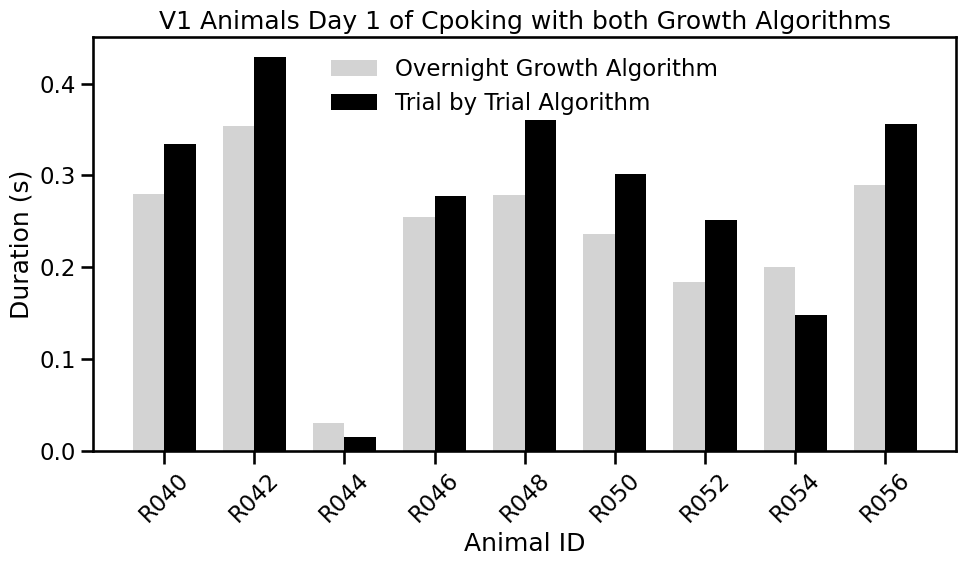

In [41]:
# Create a bar chart for each animal showing avg_valid_cpoke_dur and max_fixation_dur
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(cpoke_stats_df))

# Plot the bars
bar1 = ax.bar(
    index,
    cpoke_stats_df["avg_valid_cpoke_dur"],
    bar_width,
    label="Overnight Growth Algorithm",
    color="lightgray",
)
bar2 = ax.bar(
    index + bar_width,
    cpoke_stats_df["max_fixation_dur"],
    bar_width,
    label="Trial by Trial Algorithm",
    color="black",
)

# Add labels, title, and legend
ax.set_xlabel("Animal ID")
ax.set_ylabel("Duration (s)")
ax.set_title("V1 Animals Day 1 of Cpoking with both Growth Algorithms")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(cpoke_stats_df["animal_id"])
ax.legend(loc="upper center", frameon=False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> It appears that the animals would not infact grow more if they had the overnight growth algorithm (gray) compared to the trial by trial growth they did in the actual session (black). This suggests that the animals quickly unlearn the slower pokes (or they never do them at all). Lets focus on the early trials to see what happens.


## 3. Plot Poking Dynamis for Initial Trials


[Text(0, 0.5, 'Cpoke Duration (s)'), Text(0.5, 0, 'Trial')]

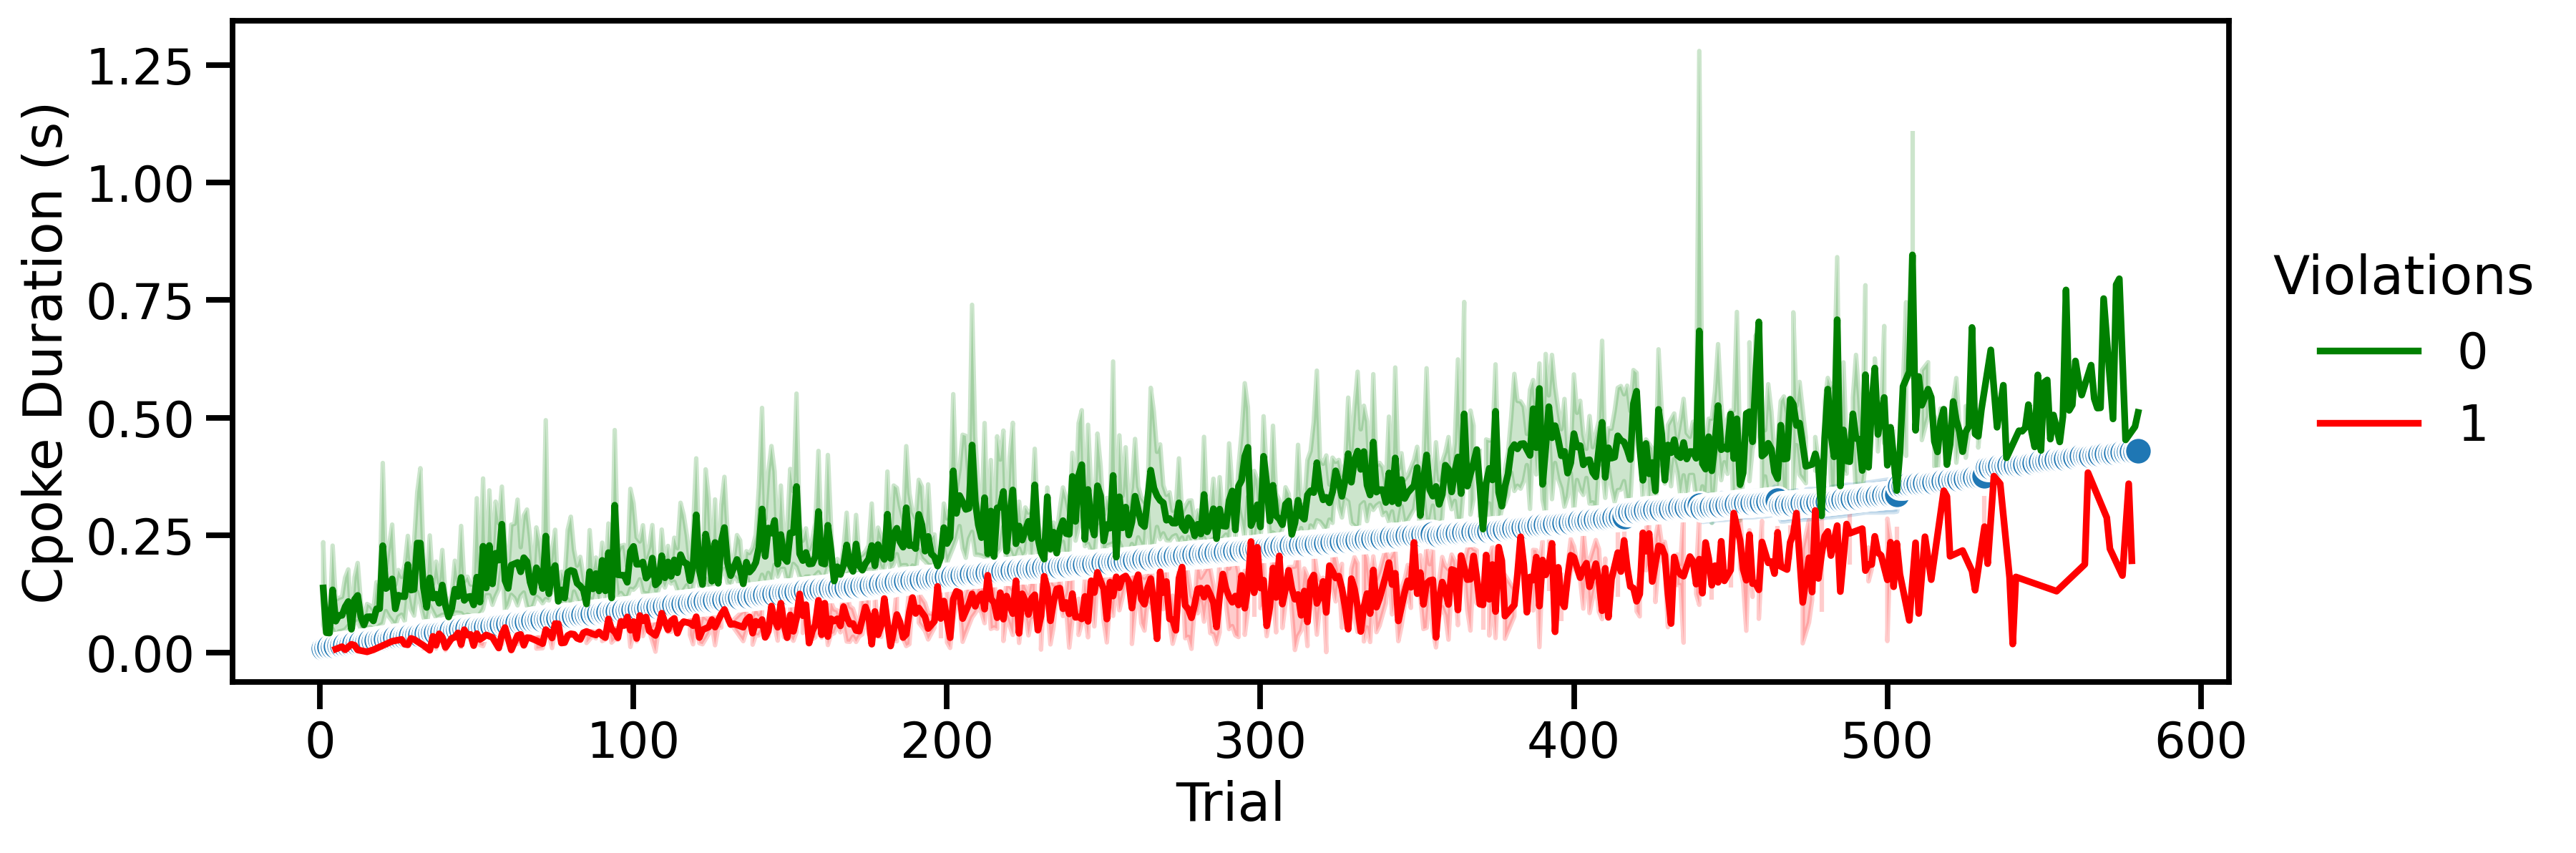

In [74]:
fig, ax = pu.make_fig()
sns.lineplot(
    data=first_day_df,
    x="trial",
    y="fixation_dur",
    ax=ax,
    marker="o",
)
sns.lineplot(
    data=first_day_df,
    x="trial",
    y="cpoke_dur",
    ax=ax,
    hue="violations",
    hue_order=[0, 1],
    palette=["green", "red"],
)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, title="Violations")
ax.set(ylabel="Cpoke Duration (s)", xlabel="Trial")

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_82373/320808677.py:10: UserWarning: 
The markers list has fewer values (2) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


[Text(0, 0.5, 'Cpoke Duration (s)'), Text(0.5, 0, 'Trial')]

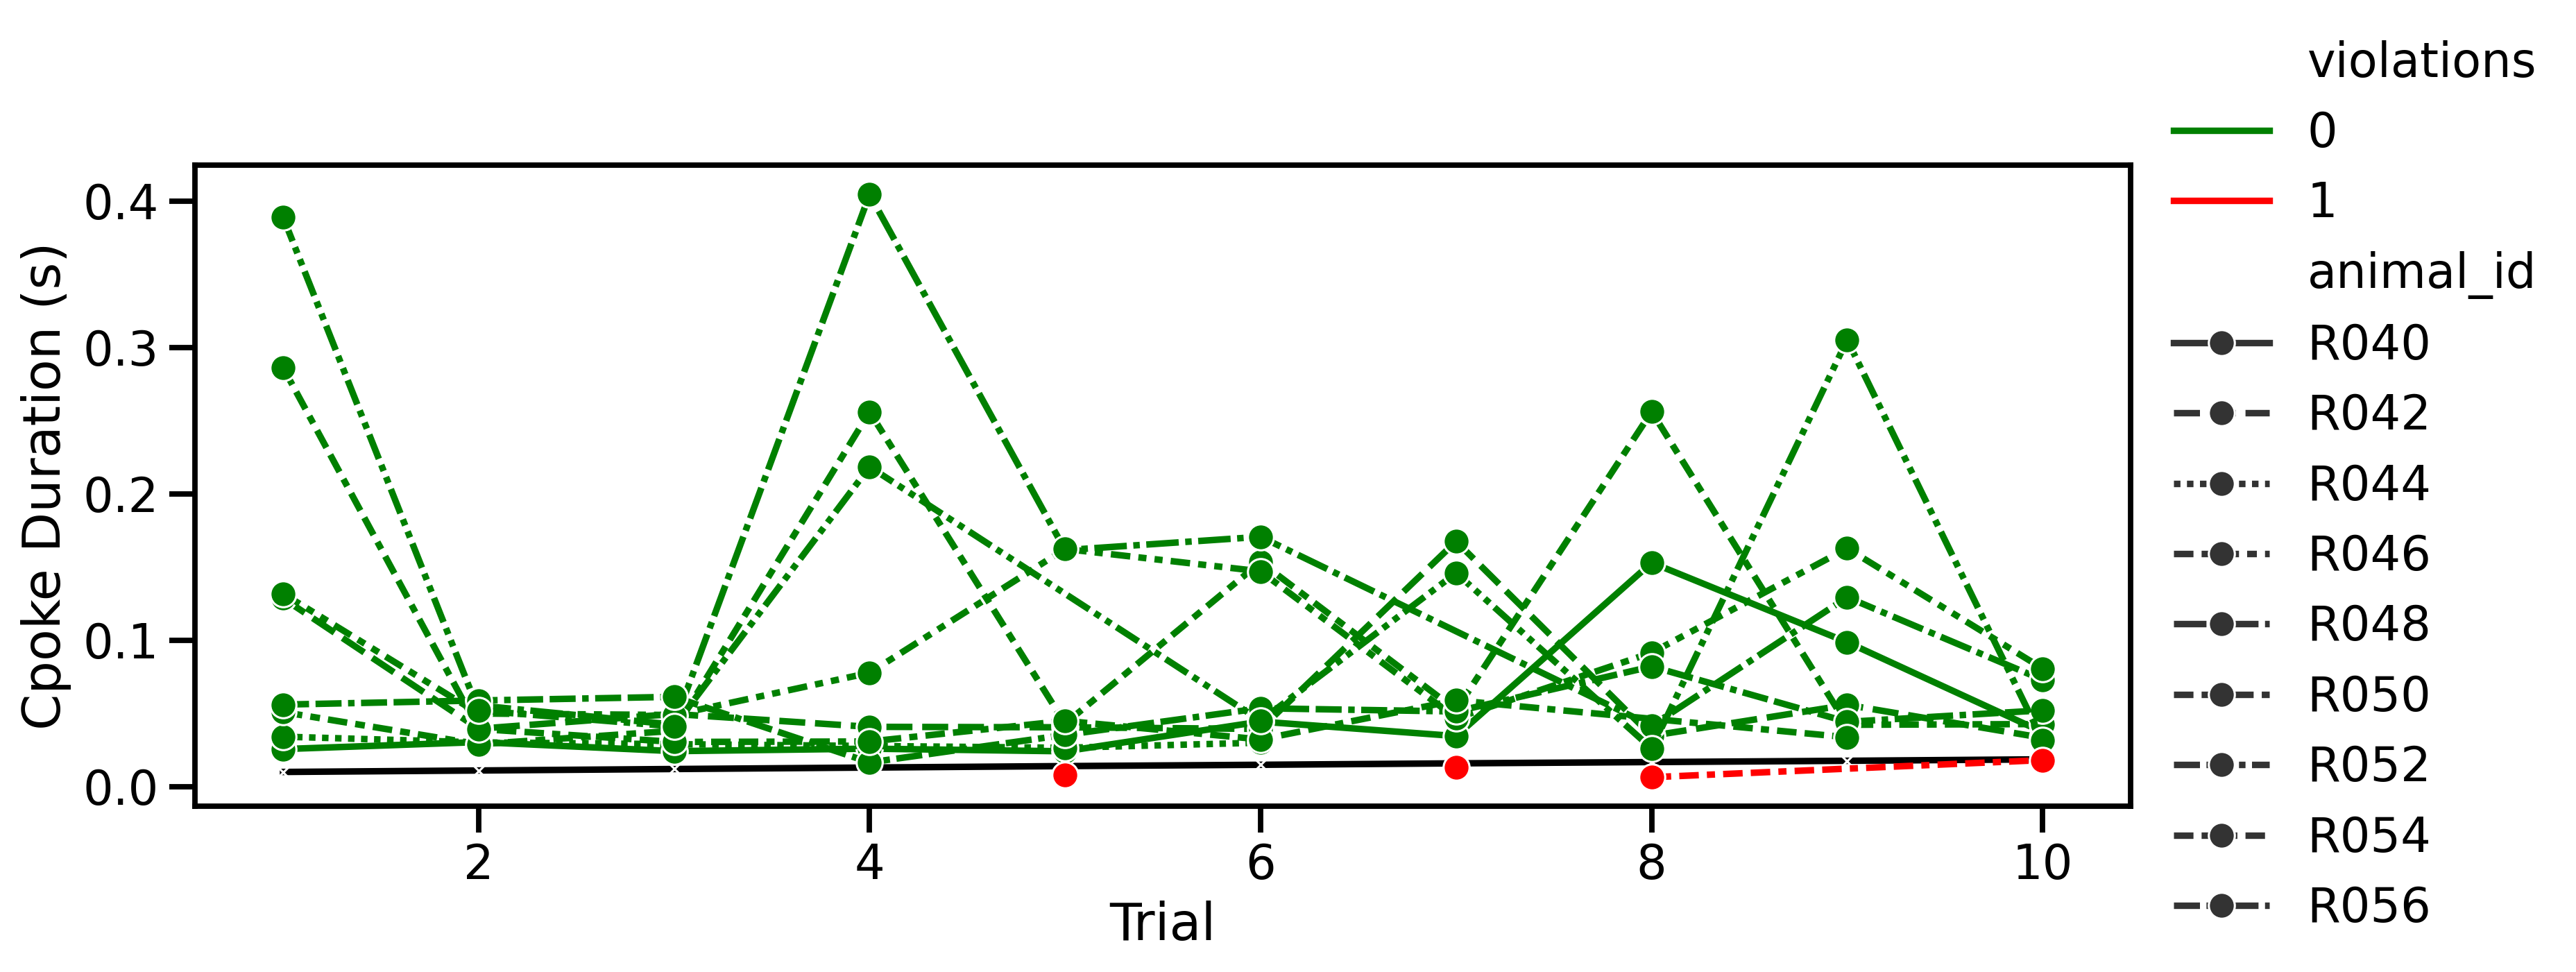

In [69]:
fig, ax = pu.make_fig()
sns.lineplot(
    data=first_day_df.query("trial <11"),
    x="trial",
    y="fixation_dur",
    ax=ax,
    marker="x",
    color="k",
)
sns.lineplot(
    data=first_day_df.query("trial < 11"),
    x="trial",
    y="cpoke_dur",
    ax=ax,
    hue="violations",
    hue_order=[0, 1],
    palette=["green", "red"],
    style="animal_id",
    markers=["o", "o"],
)
# move legend out of plot
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
ax.set(ylabel="Cpoke Duration (s)", xlabel="Trial")

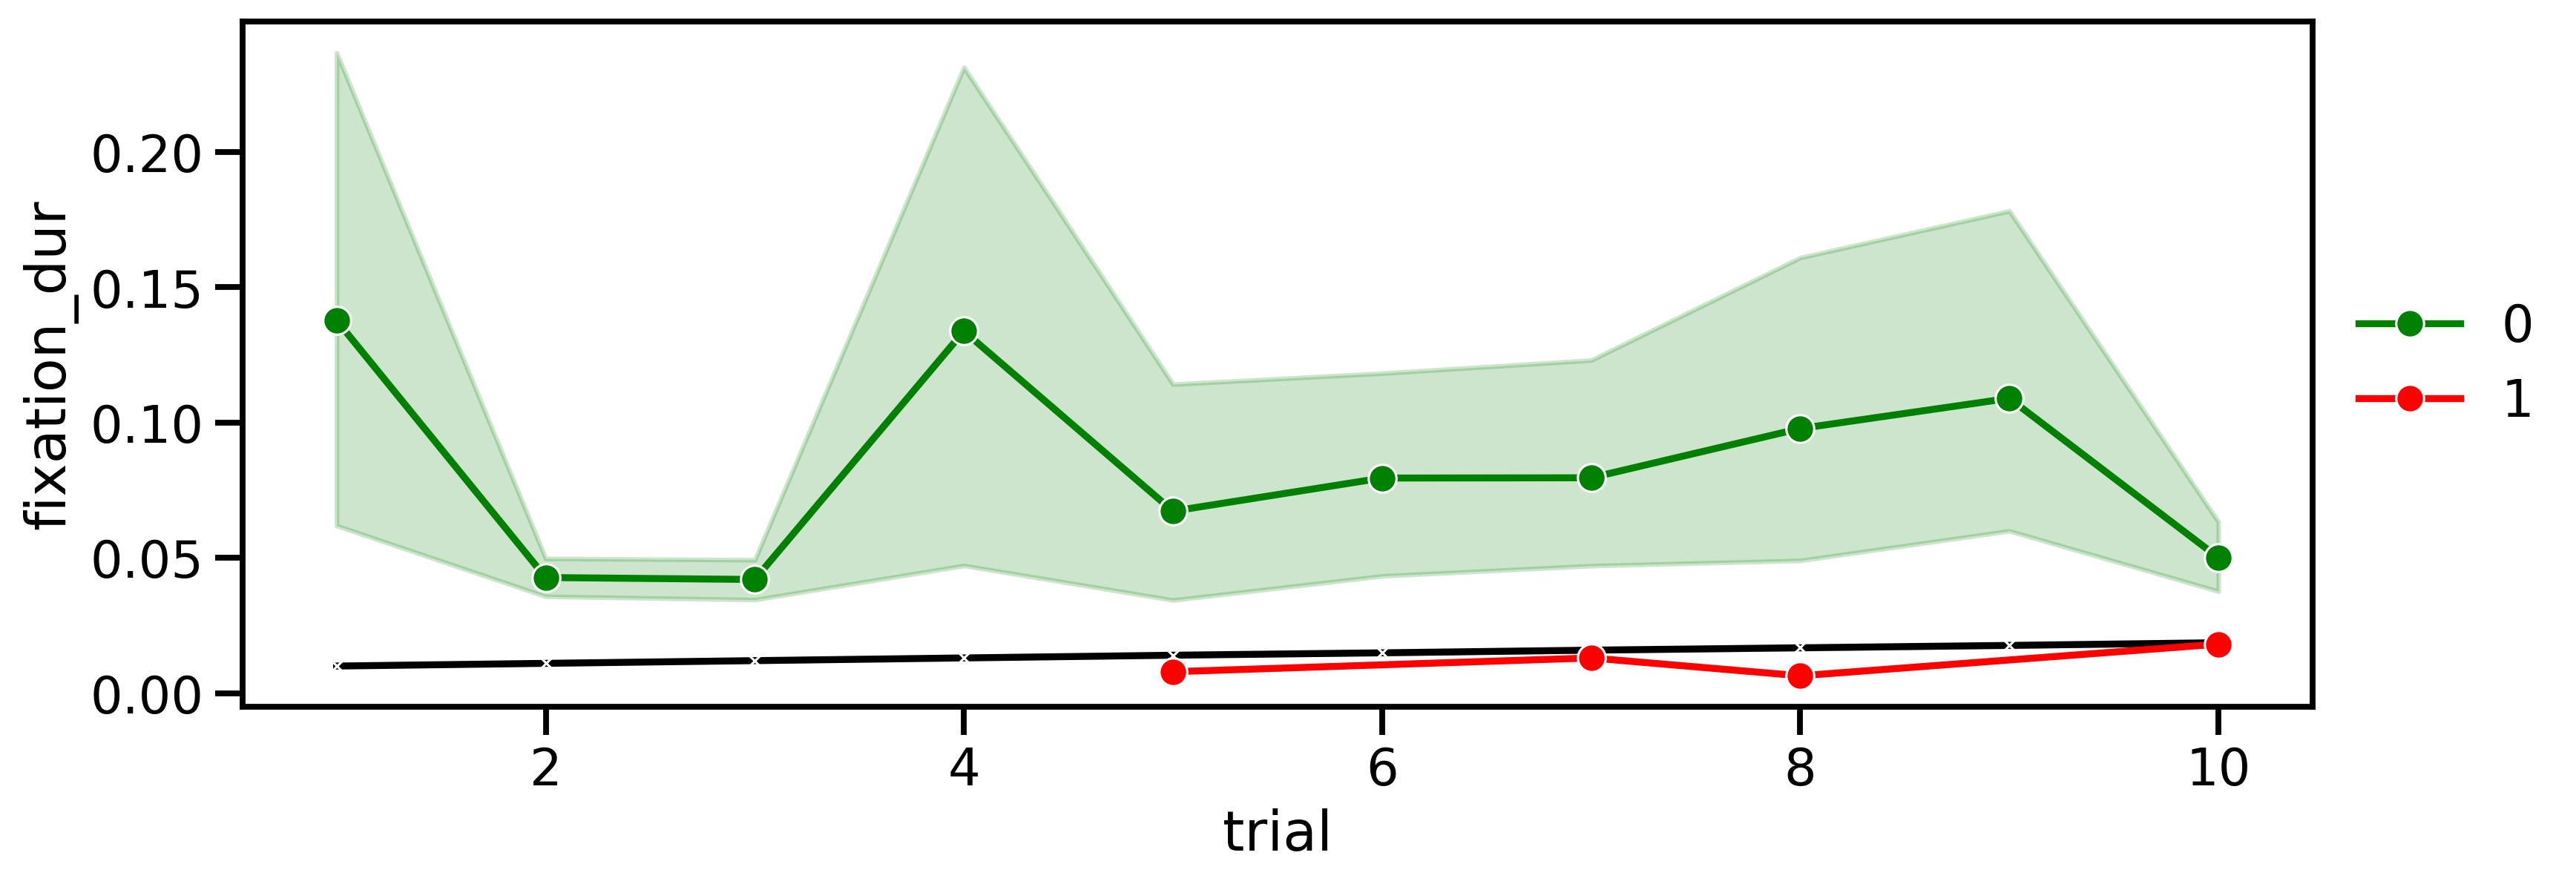

In [66]:
fig, ax = pu.make_fig()
sns.lineplot(
    data=first_day_df.query("trial <11"),
    x="trial",
    y="fixation_dur",
    ax=ax,
    marker="x",
    color="k",
)
sns.lineplot(
    data=first_day_df.query("trial < 11"),
    x="trial",
    y="cpoke_dur",
    ax=ax,
    hue="violations",
    hue_order=[0, 1],
    palette=["green", "red"],
    marker="o",
)
# move legend out of plot
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
ax.set(ylabel="Cpoke Duration (s)", xlabel="Trial")

[Text(0, 0.5, 'Cpoke Duration (s)'), Text(0.5, 0, 'Trial')]

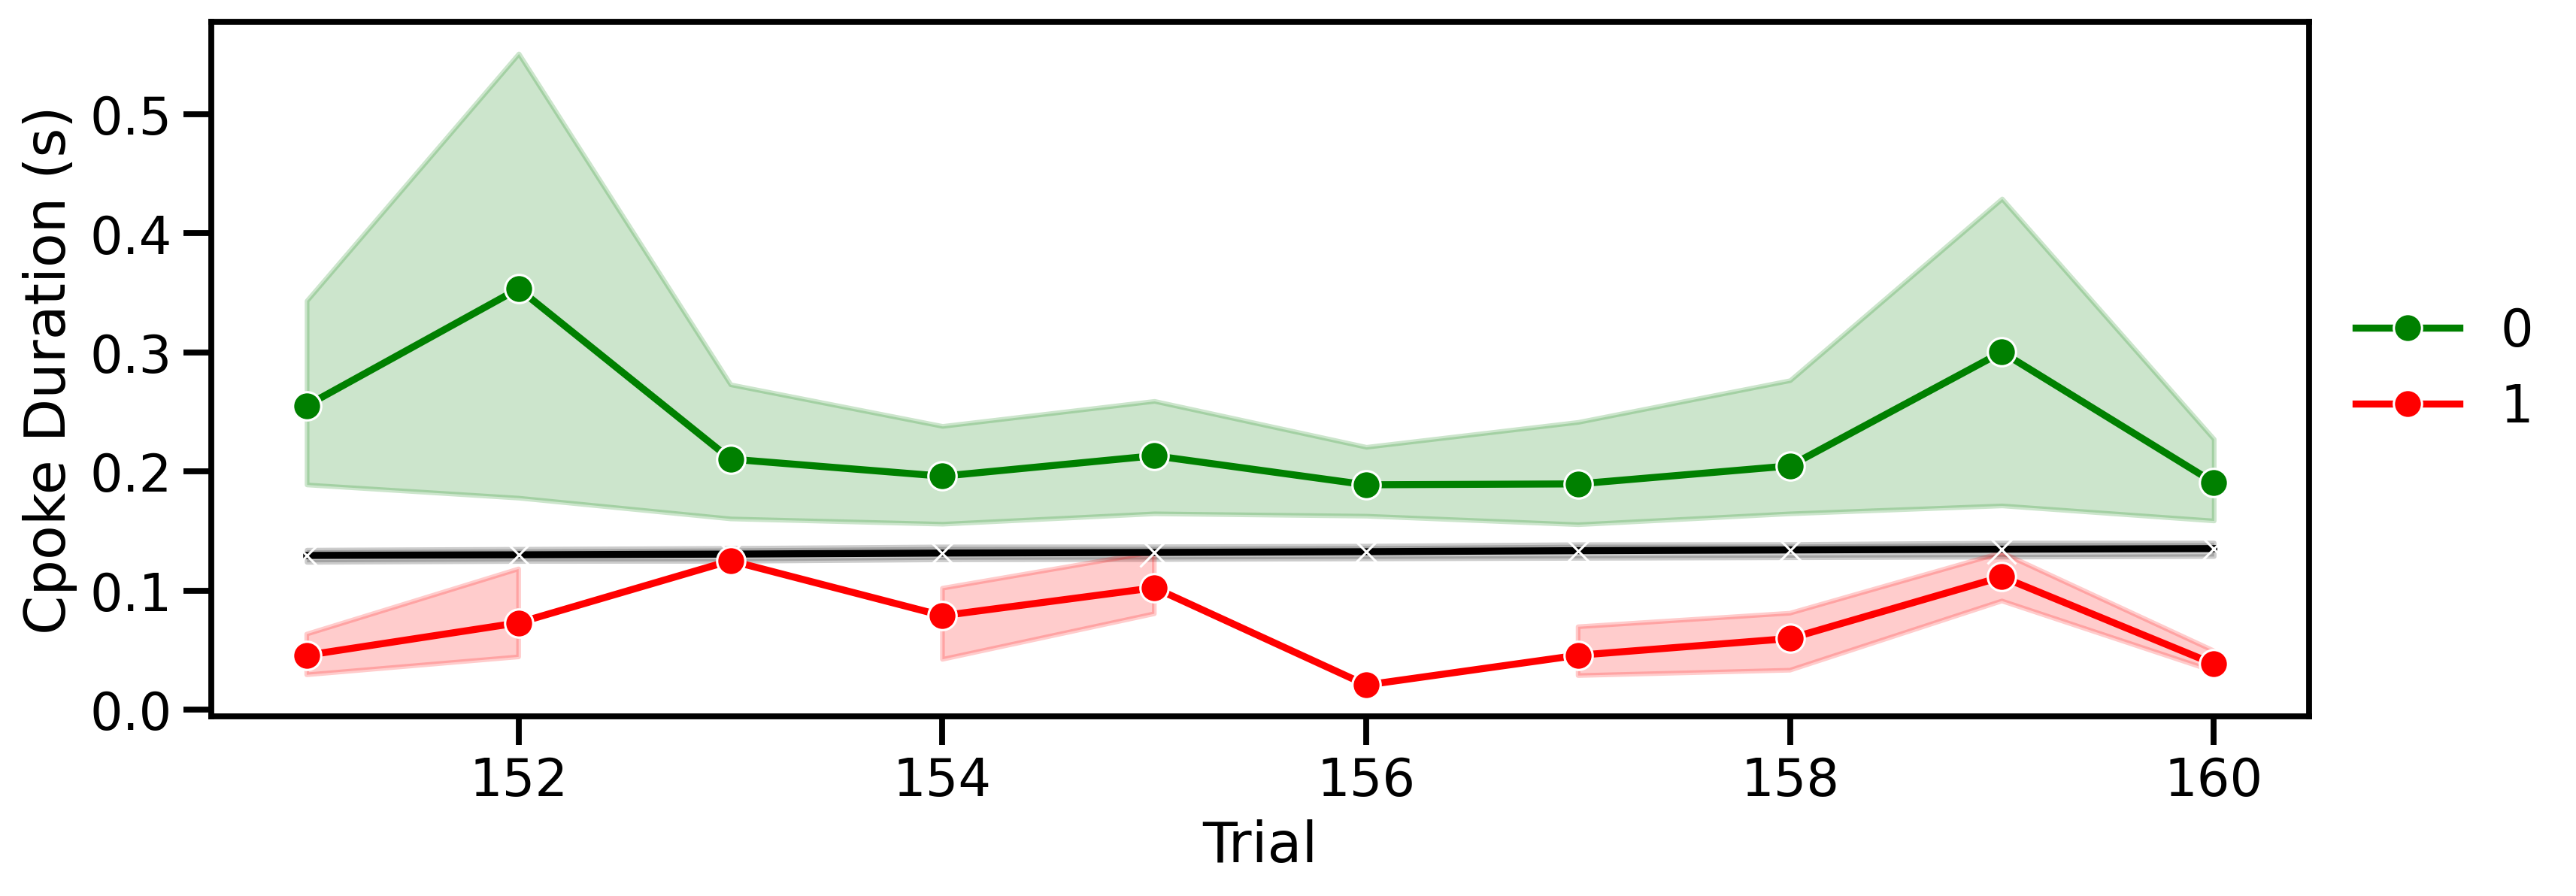

In [70]:
fig, ax = pu.make_fig()
sns.lineplot(
    data=first_day_df.query("trial >150 and trial < 161"),
    x="trial",
    y="fixation_dur",
    ax=ax,
    marker="x",
    color="k",
)
sns.lineplot(
    data=first_day_df.query("trial >150 and trial < 161"),
    x="trial",
    y="cpoke_dur",
    ax=ax,
    hue="violations",
    hue_order=[0, 1],
    palette=["green", "red"],
    marker="o",
)
# move legend out of plot
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
ax.set(ylabel="Cpoke Duration (s)", xlabel="Trial")

Next steps: want to plot this relative to the go cue for each trial and see what happens
want to look at the first 5 trials for each animal- what is their natural poke rate? Would also be interesting to make the same exact plot for the V2 animals (failed and valid)


In [10]:
days_in_stage_df = viz.df_preperation.make_days_in_stage_df(
    tdf.query("fix_experiment == 'V1'"),
    min_stage=5,
    max_stage=5,
)
days_in_stage_df

,animal_id,stage,fix_experiment,n_days
0,R040,5.0,V1,1
1,R042,5.0,V1,1
2,R044,5.0,V1,13
3,R046,5.0,V1,1
4,R048,5.0,V1,1
5,R050,5.0,V1,1
6,R052,5.0,V1,1
7,R054,5.0,V1,6
8,R056,5.0,V1,1
